##  Application Of The SVM classifier On The Dataset Iris

In [1]:
# import of the essential library
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC


In [10]:
# Load the dataset
iris = datasets.load_iris()


In [15]:
# Splitting of the data in X and y
X = iris['data'][: , (2, 3)] # Petal length and petal Width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica 
print("The 10 first lignes of the matrix \n" , X[:10 , :]) # to print the 10 first lignes of the dataset
print("The 10 first targets : \n" , y[:10])

The 10 first lignes of the matrix 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]
The 10 first targets : 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
# Definition of a Pipeline to automatise some preprocessing
svm_clf = Pipeline( steps = [
    ("scaler" , StandardScaler()),
    ("linear_svc" , LinearSVC(C = 1, loss = "hinge")),
])
svm_clf.fit(X, y)

,steps,"[('scaler', ...), ('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'hinge'
,dual,'auto'
,tol,0.0001


In [17]:
# Using of the model to make predictions
preds = svm_clf.predict([[5.5 , 1.7]])
print(preds)

[1.]


The predicted classe of the object [5.5, 1.7] is Virginica .

## Application Of The SVM Classifieur On A Non Linear Separable Dataset(Make Moon)

In [19]:
# import of the dataset makemoon
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Loading of the dataset
X, y = make_moons()


# Definition of a pipeline to preprocess the data and train a polynomial svm classifier  
poly_svm_clf = Pipeline(
    steps = [
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler" , StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", max_iter = 5000))
    ])

# Splitting of the data to drawing the Train and validation curve 
X_train, X_valid, y_train, y_valid = train_test_split(X, y ,train_size = 0.8, random_state = 42)

# Evaluation of the models
def model_score(X_train , y_train , X_valid, y_valid):
    # Training of the models
    poly_svm_clf.fit(X_train , y_train)
    predictions = poly_svm_clf.predict(X_valid)
    return mean_absolute_error(y_valid , predictions)
    
score = model_score(X_train , y_train, X_valid, y_valid)
print(f"The MAE on the prdictions of the LinearSVC model on the test_data is : {score : .4f}")



The MAE on the prdictions of the LinearSVC model on the test_data is :  0.0000


/home/thedjampi/Bureau/machine_learning_projects/venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


We can see that the linear support vector classifier has omitted any error on the predictions. Really that could on the first look a great thing be, but that could equally a problem of overfitting be. Lets check that.

/home/thedjampi/Bureau/machine_learning_projects/venv/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/tmp/ipykernel_4103/1697267990.py:34: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


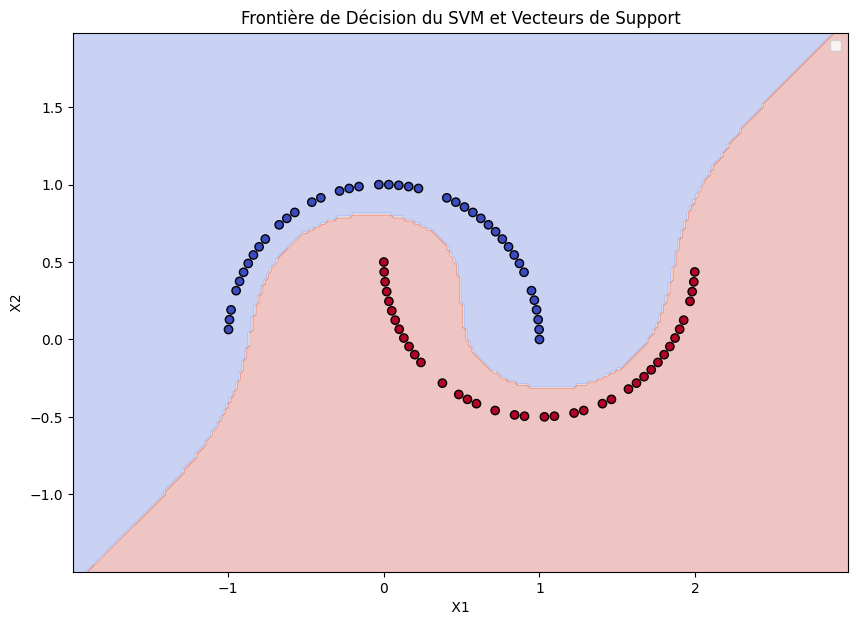

In [20]:
# Graphical visualisation of the results of the separation
import matplotlib.pyplot as plt

poly_svm_clf.fit(X_train , y_train)

# Extraction of the SVM models from the pipeline 
svm_model = poly_svm_clf.named_steps['svm_clf']

# 2. et 3. Créer la grille et prédire
# Définir les limites de la grille (ajustez-les à vos données)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Créer les points de la grille (pas de 0.02)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Prédire les classes pour chaque point de la grille
Z = poly_svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 4. Tracer le résultat
plt.figure(figsize=(10, 7))

# Remplir les zones de classification (le fond du graphique)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm) 

# Tracer les points de données réels
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')


plt.title("Frontière de Décision du SVM et Vecteurs de Support")
plt.xlabel(" X1 ")
plt.ylabel(" X2 ")
plt.legend()
plt.show()


We can remark that by adding additionals polynomial features to our originals features , we can transform a linear SVC to separate non linear separable data like the dataset make_moons. For now we going to try another method : The separation of the make_moon dataset using a kernel rbf

## Implementation of a SVM Classifier with a rbf classifier

In [26]:
from sklearn.model_selection import GridSearchCV

# initialization of the values of the parameters gamma and C
gamma_range = [0.1, 1, 4, 5, 10]
C_range = [0.1 , 1, 5, 10, 100, 1000]

# Creation of a grid for the GridSearchCV method
param_grid = {
    'svc_classifier__gamma': gamma_range,
    'svc_classifier__C': C_range
}

# Initialisation of a pipeline which going to scale the data and initialize an svc object
pipeline = Pipeline(steps = [
    ("scaler" , StandardScaler()),
    ("svc_classifier" , SVC(kernel = 'rbf', random_state = 42))
     ])

# Initialization of an GridSearchCV object
grid = GridSearchCV(
    pipeline,
    param_grid,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5,
    verbose = 2
)

# Training of the differents configuration of hyperparameters
grid.fit(X_train , y_train)

# --- Display the results ---
print("\n--- Optimized results ---")
print(f"Best score of the cross validation: {grid.best_score_:.4f}")
print("\nBest parameters ", grid.best_params_)
    




Fitting 5 folds for each of 30 candidates, totalling 150 fits

--- Optimized results ---
Best score of the cross validation: 1.0000

Best parameters  {'svc_classifier__C': 1, 'svc_classifier__gamma': 1}
[CV] END ...svc_classifier__C=0.1, svc_classifier__gamma=0.1; total time=   0.0s
[CV] END ....svc_classifier__C=0.1, svc_classifier__gamma=10; total time=   0.0s
[CV] END ....svc_classifier__C=0.1, svc_classifier__gamma=10; total time=   0.0s
[CV] END ...svc_classifier__C=1.0, svc_classifier__gamma=0.1; total time=   0.0s
[CV] END ...svc_classifier__C=1.0, svc_classifier__gamma=0.1; total time=   0.0s
[CV] END ...svc_classifier__C=1.0, svc_classifier__gamma=0.1; total time=   0.0s
[CV] END .....svc_classifier__C=1.0, svc_classifier__gamma=1; total time=   0.0s
[CV] END .....svc_classifier__C=1.0, svc_classifier__gamma=4; total time=   0.0s
[CV] END .....svc_classifier__C=1.0, svc_classifier__gamma=5; total time=   0.0s
[CV] END .....svc_classifier__C=1.0, svc_classifier__gamma=5; total 

/tmp/ipykernel_4103/2802569949.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


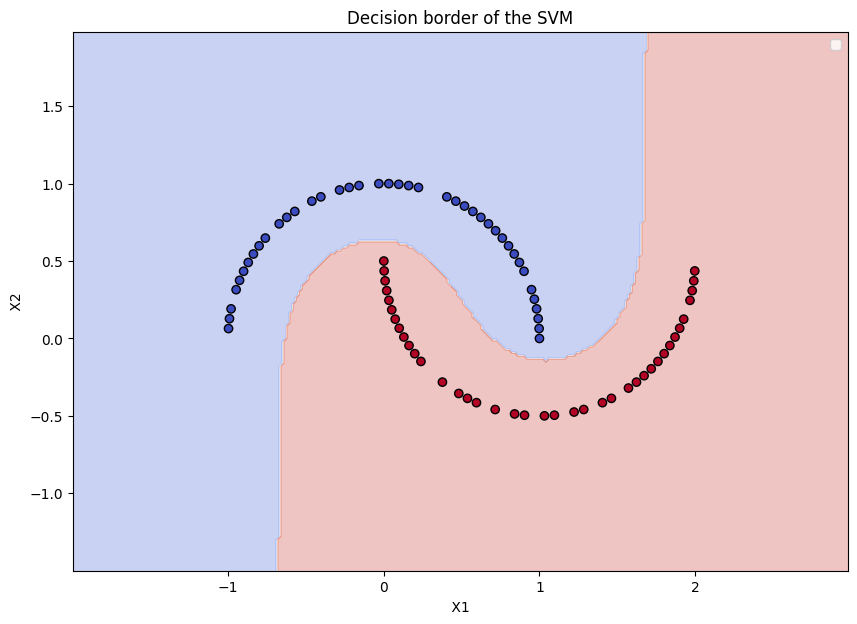

In [29]:
# Display the graphical representation of the separation by the best model
best_svm_classifier = SVC(kernel = 'rbf', C = grid.best_params_['svc_classifier__C'], gamma = grid.best_params_['svc_classifier__gamma'])
best_svm_classifier.fit(X_train, y_train)

# Define the limits of the grid (scale the data)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
# Create the points of the grid (steps of 0.02)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the classes for each points of the grid
Z = best_svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the results
plt.figure(figsize=(10, 7))

# Fill the classification area (the background of the graphic)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm) 

# Plots the points of the dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')


plt.title("Decision border of the SVM")
plt.xlabel(" X1 ")
plt.ylabel(" X2 ")
plt.legend()
plt.show()

That look pretty nice ! The results of the separation is well display. Accord the graph we can say that the marges between the two classes are enough wide and the each is well positionned. Was the power of the kernel do, is that it uses the similarity between the points of the datasets and other additional feature to transpose the points in a space where they could easily separated , separate them and then come back in the original space with the separated data. 

Okay that was a little application of SVM classifier on linearly and non linearly data using the sklearn classes LINEAR_svc and SVC and some kernel like rbf to make classifications and predictions .